In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from dwave.system import LeapHybridSampler
from itertools import product
import matplotlib.pyplot as plt

import DataLoader
import utils
import argparse
# "C:\Users\Naosat\Downloads\Telegram Desktop\breast-cancer quantum_train.csv"

In [5]:
df = pd.read_csv(r"C:\Users\Naosat\Downloads\Telegram Desktop\breast-cancer quantum_train.csv")

data=df
df.head()

,0,1,2,3,4,5,6,target
0,-1.447987,-0.456023,-1.366651,-0.280696,0.693984,2.147190,1.859432,0
1,1.977508,1.694187,2.089619,0.810729,0.733436,1.936879,2.463465,1
2,-1.407089,-1.263516,-1.349763,0.016703,-1.490797,0.616770,0.052877,0
3,-0.987600,1.380033,-0.986877,-0.561131,0.768505,0.822228,-0.137199,0
4,-1.123927,-1.026155,-1.129395,0.399279,-0.213419,1.061659,-0.207578,0


In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from CSV file
# file_path = 'your_data.csv'  # Replace with your actual file path
# data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Define the key variable (strata) and the desired sample size
key_variable = 'target'  # Replace with your actual key variable
desired_sample_size = 100  # Adjust based on your requirements

# Calculate the proportion for each class in the original dataset
class_counts = data[key_variable].value_counts(normalize=True)
print("\nClass Proportions in Original Data:")
print(class_counts)

# Calculate the number of samples needed for each class in the desired sample
class_sample_sizes = (class_counts * desired_sample_size).astype(int)
print("\nSample Sizes per Class in Desired Sample:")
print(class_sample_sizes)

# Create an empty DataFrame to store the stratified sample
stratified_sample = pd.DataFrame()

# Perform stratified sampling
for class_label, sample_size in class_sample_sizes.items():
    class_data = data[data[key_variable] == class_label]
    class_sample = class_data.sample(n=sample_size, random_state=42)
    stratified_sample = pd.concat([stratified_sample, class_sample], axis=0)

# Shuffle the final stratified sample to mix the rows
stratified_sample = stratified_sample.sample(frac=1, random_state=42).reset_index(drop=True)

Original Data:
          0         1         2         3         4         5         6  \
0 -1.447987 -0.456023 -1.366651 -0.280696  0.693984  2.147190  1.859432   
1  1.977508  1.694187  2.089619  0.810729  0.733436  1.936879  2.463465   
2 -1.407089 -1.263516 -1.349763  0.016703 -1.490797  0.616770  0.052877   
3 -0.987600  1.380033 -0.986877 -0.561131  0.768505  0.822228 -0.137199   
4 -1.123927 -1.026155 -1.129395  0.399279 -0.213419  1.061659 -0.207578   

   target  
0       0  
1       1  
2       0  
3       0  
4       0  

Class Proportions in Original Data:
target
0    0.628571
1    0.371429
Name: proportion, dtype: float64

Sample Sizes per Class in Desired Sample:
target
0    62
1    37
Name: proportion, dtype: int32


In [8]:
# X = df.drop(columns=['survived']).values
from sklearn.preprocessing import StandardScaler
X=stratified_sample.drop(columns=[key_variable]).values
y = stratified_sample[key_variable].values

X_std = StandardScaler().fit_transform(X)

In [11]:
X=X_std

In [15]:
df=stratified_sample
df.isnull().sum()
df1=df

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

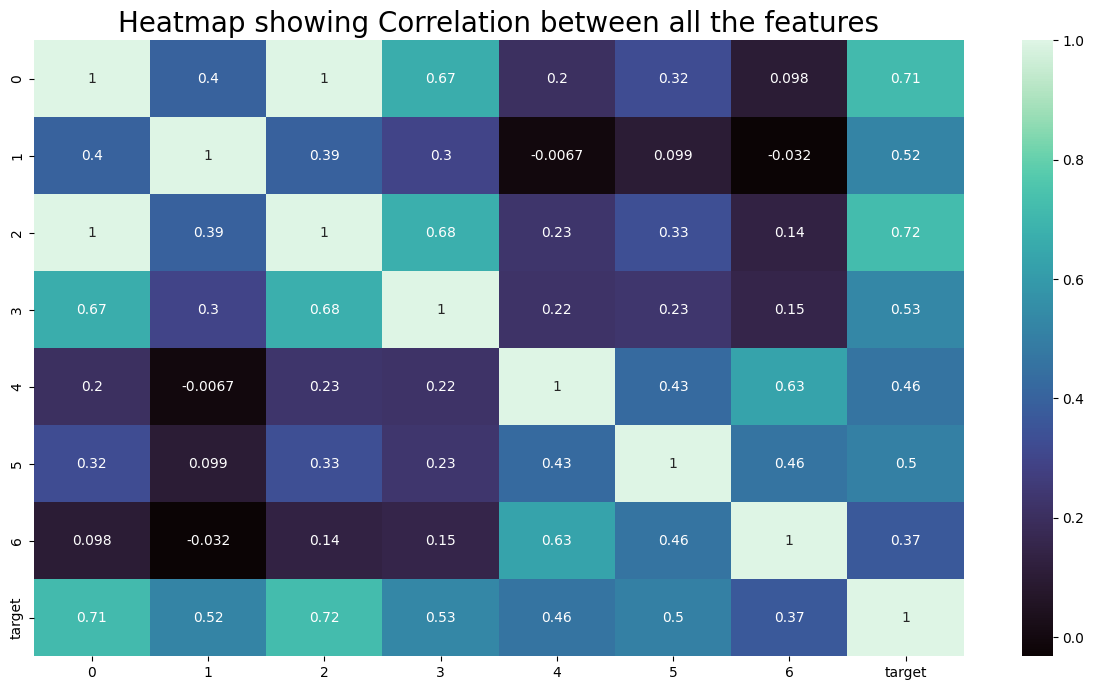

In [16]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

In [18]:
zero_class = df1[df1[key_variable]==0]
zero_class.shape

(62, 8)

In [20]:
one_class = df1[df1[key_variable]==1]
one_class.shape

(37, 8)

In [23]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop(key_variable,axis=1)).transform(df1.drop(key_variable,axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,0,1,2,3,4,5,6
0,1.322364,0.633618,1.268641,1.264131,0.652263,1.086123,0.827773
1,-1.121508,-0.821880,-1.098266,-0.516910,0.306762,-0.758643,0.411475
2,1.508606,0.102045,1.410893,1.053983,0.647889,0.615920,0.248357
3,-0.063491,-0.062490,-0.081563,-0.202368,0.333003,-0.214774,0.299371
4,-0.783808,-0.024520,-0.691269,-0.691201,3.652430,1.830613,3.447738


In [25]:
x = X
y = y

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

NameError: name 'SVC' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
print(classification_report(y_test,y_pred))